## This notebook will analyse and visualise the results of the cocktail party nightmare as the number of bats in a group increase. The results shown here are what the centre-most bat in the group will be experiencing. 

In [2]:
import re
import glob
import pickle
import sys
sys.path.append('..//')
from extract_results_from_simoutput import *


In [11]:
[ glob.glob('D:\\group_size\\'+str(Nbats)+'bats_CPN*.pkl')[0] for Nbats in group_size]

['D:\\group_size\\5bats_CPN_uuid_fde94356-d0b2-49de-b4fc-9e9e32f48a05_numpyseed_92052834.pkl',
 'D:\\group_size\\10bats_CPN_uuid_07a6828c-d0e7-4b5f-b95e-8748ea712a0e_numpyseed_15898988.pkl',
 'D:\\group_size\\15bats_CPN_uuid_5dcf42ba-3eb8-4734-8846-f915df635fbf_numpyseed_21078895.pkl']

In [12]:
#load results
group_size = [5,10,15]
result_files = [ glob.glob('D:\\group_size\\'+str(Nbats)+'bats_CPN*.pkl')[0] for Nbats in group_size]
# extract relevant information from simulation outputs:
r_groups, theta_groups, nn_groups, level_groups  = {}, {}, {}, {}
echoesheard = {}

for i,groupsize in enumerate(group_size):
    with open(result_files[i], 'rb') as results:
        simoutputs = pickle.load(results)
        group_results = []
        numechoes_heard = []
        for _, outputs in simoutputs.iteritems():
            processed_results = gather_results_from_simoutput(outputs)
            num_echoes = processed_results.shape[0]
            group_results.append(processed_results)
            numechoes_heard.append(num_echoes)
        r, theta, nn, level = np.split(np.concatenate(group_results).reshape(-1,4), 4, axis=1)
        echoesheard[groupsize] = numechoes_heard
        r_groups[groupsize] = r
        theta_groups[groupsize] = theta
        nn_groups[groupsize] = nn
        level_groups[groupsize] = level

KeyboardInterrupt: 

In [3]:
%matplotlib notebook

<IPython.core.display.Javascript object>


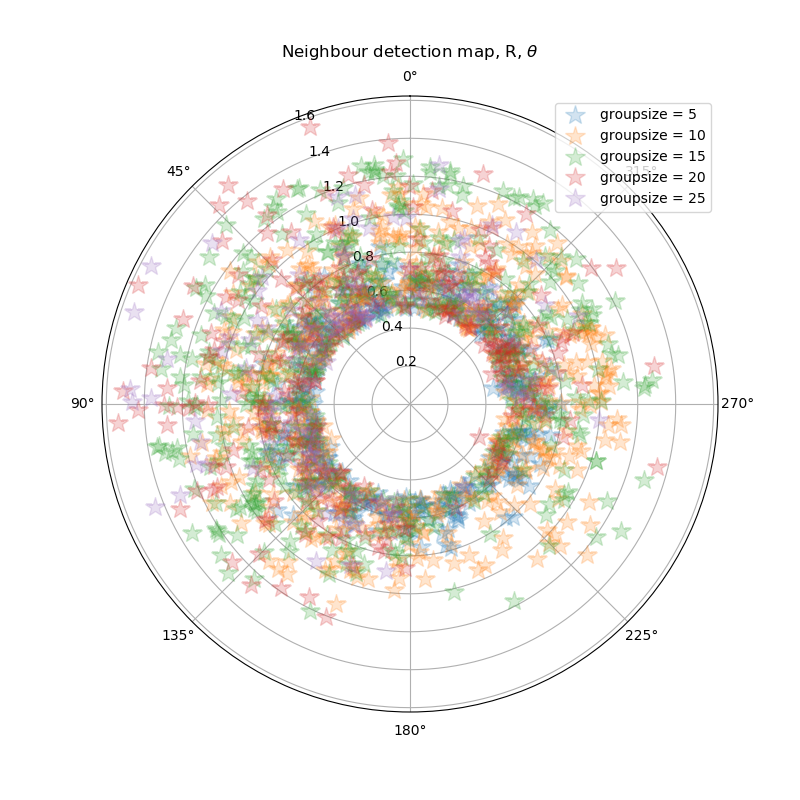

In [4]:
plt.figure(figsize=(8,8))
a = plt.subplot(111, projection='polar')
a.set_theta_zero_location("N")
for nbats in group_size:
    plt.plot(np.deg2rad(theta_groups[nbats]),r_groups[nbats],  '*', markersize=15,
             alpha=0.2, label='groupsize = '+str(nbats))
plt.legend()
plt.title('Neighbour detection map, R, $\\theta$');

<IPython.core.display.Javascript object>


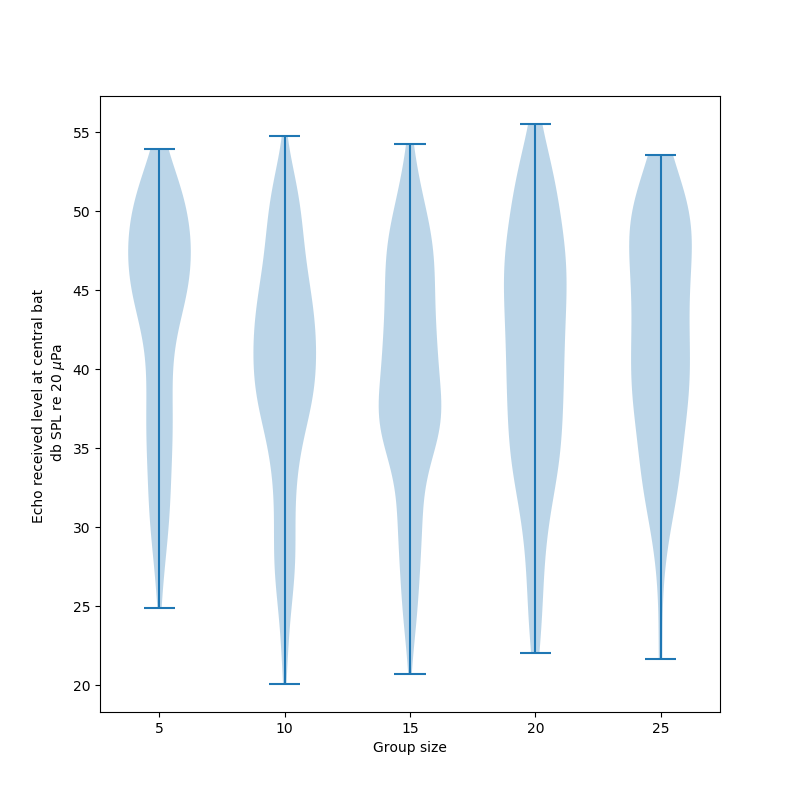

Text(0.5,0,'Group size')

In [5]:
echo_levels = [ level_groups[nbats] for nbats in group_size]
plt.figure(figsize=(8,8))
plt.violinplot(echo_levels);
plt.ylabel('Echo received level at central bat \n db SPL re 20 $\\mu$Pa')
plt.xticks(range(1,6), group_size);plt.xlabel('Group size')

<IPython.core.display.Javascript object>


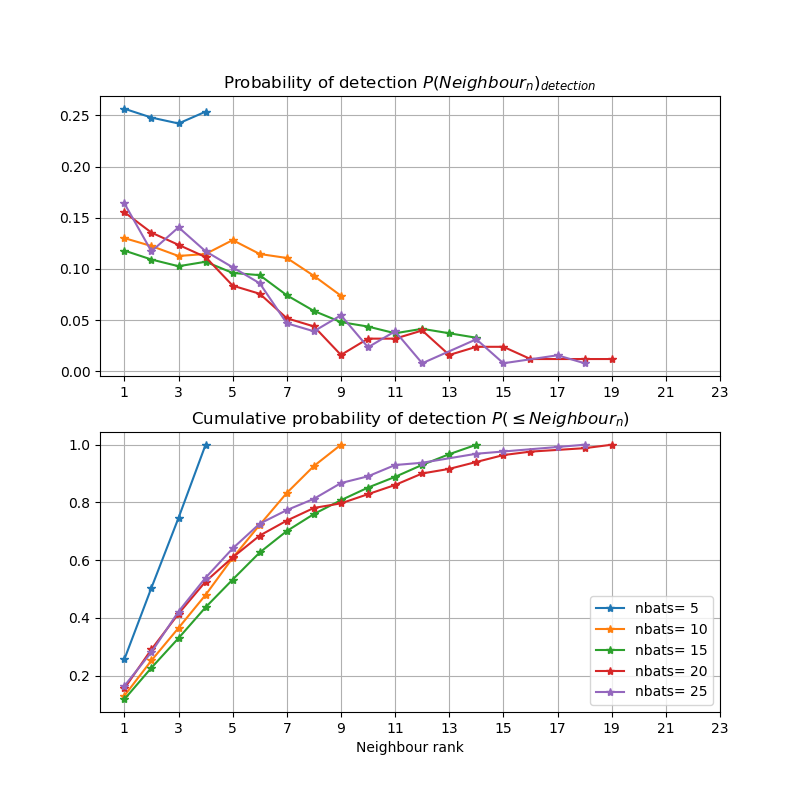

In [19]:
# visualise how the nearest neighbours detected changes with group size:
plt.figure(figsize=(8,8))
for nbats in group_size:
    nn, nn_counts = np.unique(np.int64(nn_groups[nbats].flatten()), return_counts=True)
    plt.subplot(211)
    plt.title('Probability of detection $P(Neighbour_{n})_{detection}$')
    plt.plot(nn, nn_counts/float(np.sum(nn_counts)), '*-', label='nbats= '+str(nbats))
    plt.xticks(np.arange(1,25,2));plt.grid()
    plt.subplot(212)
    plt.title('Cumulative probability of detection $P(\leq Neighbour_{n})$')
    plt.plot(nn, np.cumsum(nn_counts/float(np.sum(nn_counts))), '*-', label='nbats= '+str(nbats))
    plt.xlabel('Neighbour rank')
plt.xticks(np.arange(1,25,2));plt.grid()
plt.legend()

<IPython.core.display.Javascript object>


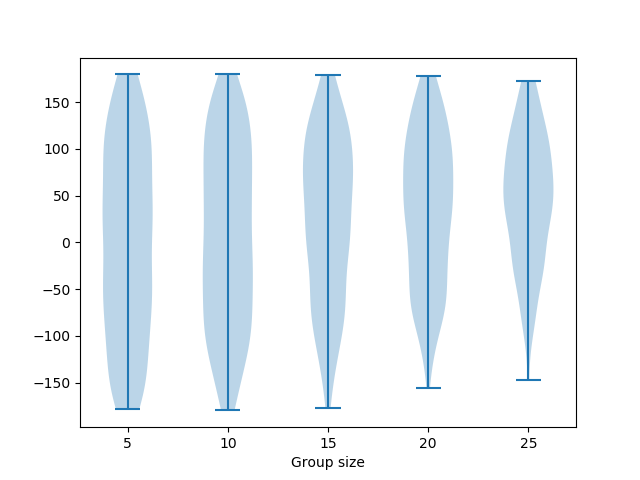

Text(0.5,0,'Group size')

In [7]:
plt.figure()
angles = [theta_groups[nbats] for nbats in group_size]
plt.violinplot(angles)
plt.xticks(range(1,6), group_size);plt.xlabel('Group size')

<IPython.core.display.Javascript object>


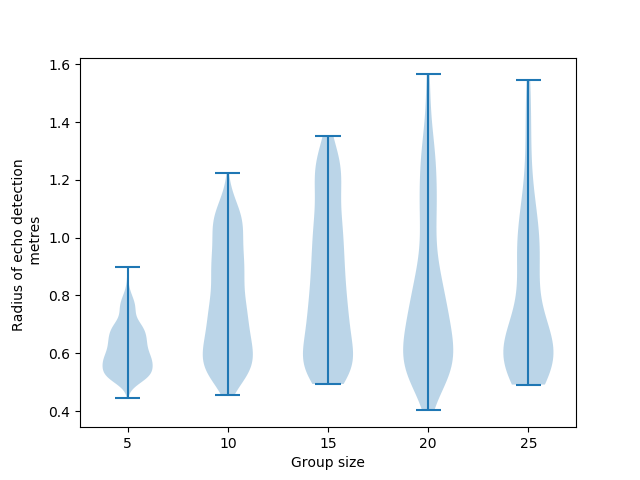

Text(0.5,0,'Group size')

In [15]:
plt.figure()
radii_detection = [r_groups[nbats] for nbats in group_size]
plt.violinplot(radii_detection)
plt.ylabel('Radius of echo detection \n metres')
plt.xticks(range(1,6), group_size);plt.xlabel('Group size')

<IPython.core.display.Javascript object>


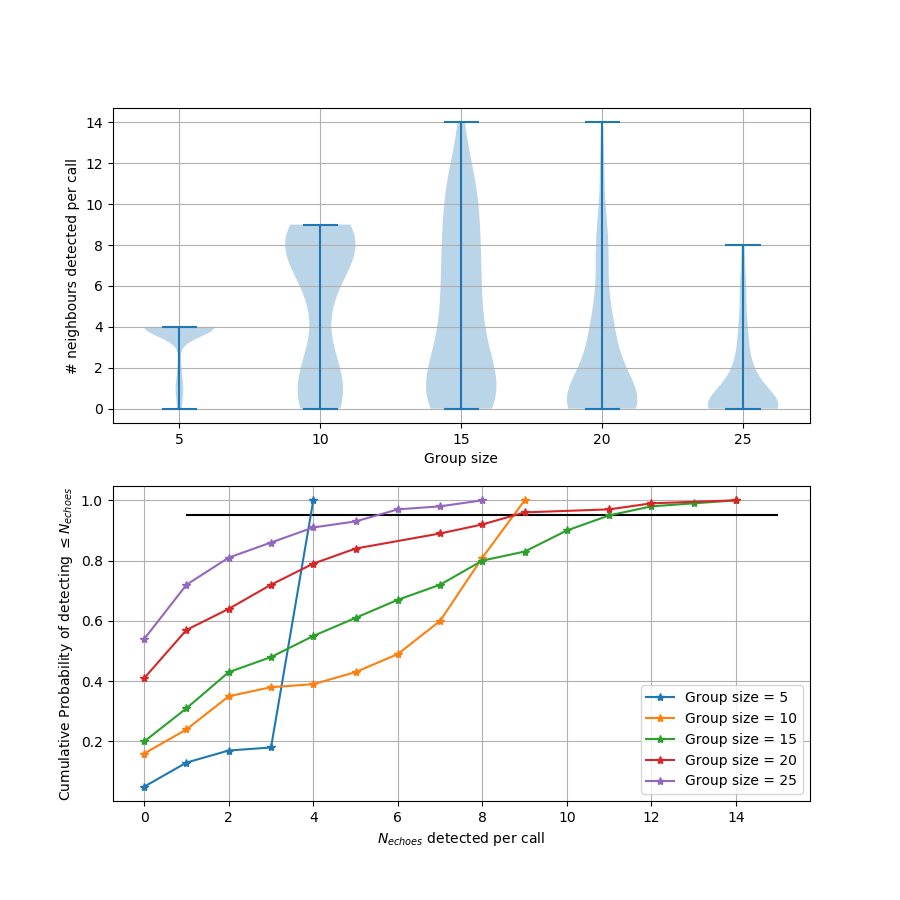

In [16]:
plt.figure(figsize=(9,9))
numechoes = [echoesheard[nbats] for nbats in group_size]

plt.subplot(211)
plt.violinplot(numechoes);plt.xticks(range(1,6), group_size);plt.xlabel('Group size');
plt.ylabel('# neighbours detected per call');plt.grid()
plt.subplot(212)
for nbats in group_size:
    numechoes, freq_heard = np.unique(echoesheard[nbats], return_counts=True)
    plt.plot(numechoes, np.cumsum(freq_heard/float(np.sum(freq_heard))), '*-',
            label='Group size = '+str(nbats));plt.grid()
plt.ylabel('Cumulative Probability of detecting $\leq N_{echoes}$ ')
plt.xlabel('$N_{echoes}$ detected per call')
plt.hlines(0.95,1,15)
plt.legend()